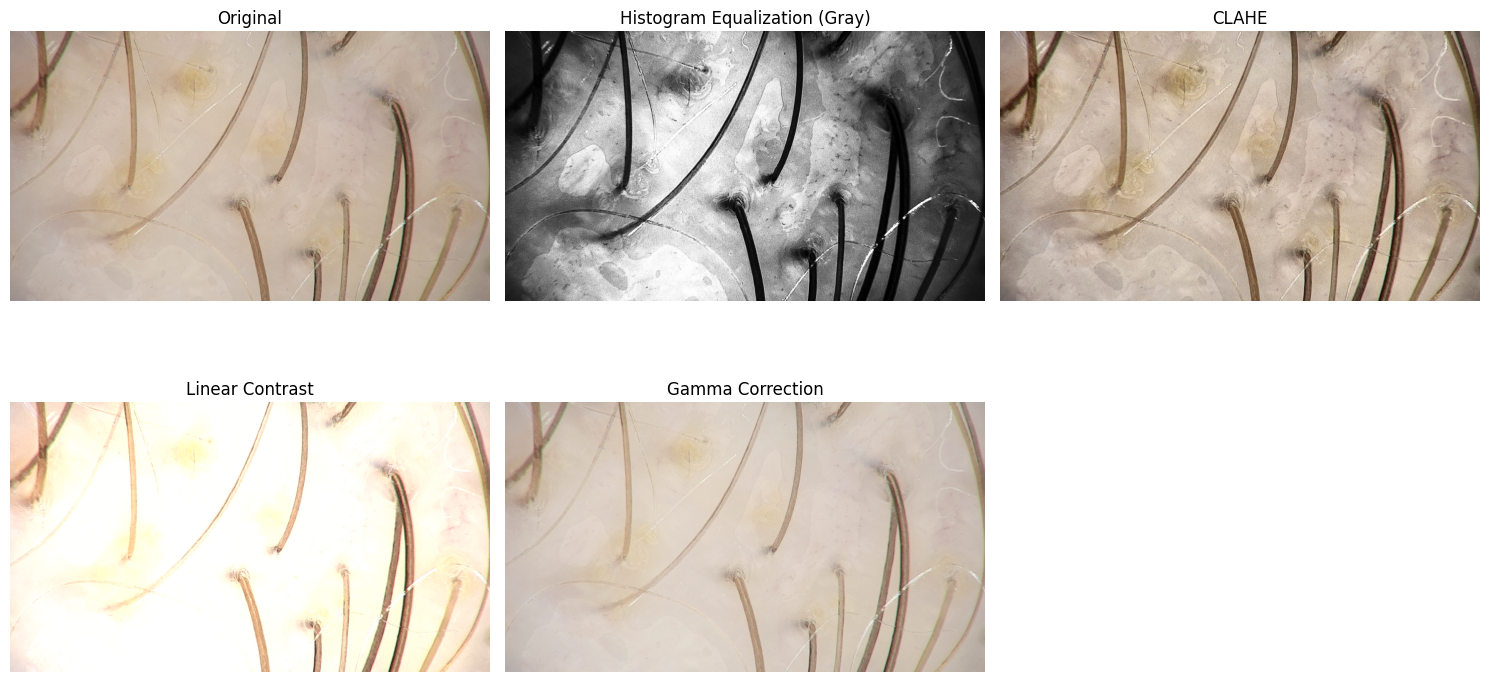

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load color image
img = cv2.imread('./łysienie/03945.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Histogram Equalization (grayscale)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_gray = cv2.equalizeHist(gray)
equalized_gray_rgb = cv2.cvtColor(equalized_gray, cv2.COLOR_GRAY2RGB)

# 2. CLAHE (on L-channel of LAB)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
merged_lab = cv2.merge((cl, a, b))
clahe_bgr = cv2.cvtColor(merged_lab, cv2.COLOR_LAB2BGR)
clahe_rgb = cv2.cvtColor(clahe_bgr, cv2.COLOR_BGR2RGB)

# 3. Simple Linear Contrast Adjustment
alpha = 1.5  # Contrast control
beta = 0     # Brightness control
linear_contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
linear_rgb = cv2.cvtColor(linear_contrast, cv2.COLOR_BGR2RGB)

# 4. Gamma Correction
gamma = 1.5
inv_gamma = 1.0 / gamma
table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
gamma_corrected = cv2.LUT(img, table)
gamma_rgb = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)

# Plotting
titles = ['Original', 'Histogram Equalization (Gray)', 'CLAHE', 'Linear Contrast', 'Gamma Correction']
images = [img_rgb, equalized_gray_rgb, clahe_rgb, linear_rgb, gamma_rgb]

plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
